In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [2]:
df_geo = pd.read_csv('../data_tables/geo_technology_species.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_geo

,Accession,Series Type,Taxonomy
0,GSE1,Expression profiling by array,Homo sapiens
1,GSE2,Expression profiling by array,Mus musculus
2,GSE3,Expression profiling by array,Homo sapiens
3,GSE4,Expression profiling by array,Arabidopsis thaliana
4,GSE5,Expression profiling by array,Caenorhabditis elegans
...,...,...,...
118670,GSE137106,Expression profiling by high throughput sequen...,Homo sapiens
118671,GSE137458,Non-coding RNA profiling by high throughput se...,Mus musculus
118672,GSE137562,Expression profiling by high throughput sequen...,Rattus norvegicus
118673,GSE137563,Non-coding RNA profiling by high throughput se...,Mus musculus;Rattus norvegicus


In [3]:
df_geo.columns = ['GEOSeries','Technology','Species']
df_geo

,GEOSeries,Technology,Species
0,GSE1,Expression profiling by array,Homo sapiens
1,GSE2,Expression profiling by array,Mus musculus
2,GSE3,Expression profiling by array,Homo sapiens
3,GSE4,Expression profiling by array,Arabidopsis thaliana
4,GSE5,Expression profiling by array,Caenorhabditis elegans
...,...,...,...
118670,GSE137106,Expression profiling by high throughput sequen...,Homo sapiens
118671,GSE137458,Non-coding RNA profiling by high throughput se...,Mus musculus
118672,GSE137562,Expression profiling by high throughput sequen...,Rattus norvegicus
118673,GSE137563,Non-coding RNA profiling by high throughput se...,Mus musculus;Rattus norvegicus


In [4]:
df_geo_count = pd.read_csv('../data_tables/GEOSeries_count.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_geo_count 

,Unnamed: 0,Count,Count.1
0,0,GSE1,61
1,1,GSE10,2
2,2,GSE100,1
3,3,GSE1000,1
4,4,GSE10000,4
...,...,...,...
44734,44734,GSE99990,1
44735,44735,GSE99991,1
44736,44736,GSE99992,2
44737,44737,GSE99993,1


In [5]:
df_geo_count = df_geo_count.drop(df_geo_count.columns[[0]], axis=1)
df_geo_count

,Count,Count.1
0,GSE1,61
1,GSE10,2
2,GSE100,1
3,GSE1000,1
4,GSE10000,4
...,...,...
44734,GSE99990,1
44735,GSE99991,1
44736,GSE99992,2
44737,GSE99993,1


In [6]:
df_geo_count.columns = ['GEOSeries','Count']
df_geo_count

,GEOSeries,Count
0,GSE1,61
1,GSE10,2
2,GSE100,1
3,GSE1000,1
4,GSE10000,4
...,...,...
44734,GSE99990,1
44735,GSE99991,1
44736,GSE99992,2
44737,GSE99993,1


In [7]:
df_combined=pd.merge(df_geo, df_geo_count, on="GEOSeries")
df_combined

,GEOSeries,Technology,Species,Count
0,GSE1,Expression profiling by array,Homo sapiens,61
1,GSE2,Expression profiling by array,Mus musculus,11
2,GSE3,Expression profiling by array,Homo sapiens,11
3,GSE4,Expression profiling by array,Arabidopsis thaliana,9
4,GSE5,Expression profiling by array,Caenorhabditis elegans,21
...,...,...,...,...
44531,GSE67888,Expression profiling by array;Non-coding RNA p...,Mus musculus;synthetic construct,1
44532,GSE87560,Expression profiling by high throughput sequen...,Homo sapiens,1
44533,GSE104272,Expression profiling by array,Homo sapiens,1
44534,GSE120376,in the pluripotent state and after induced di...,Expression profiling by high throughput sequen...,1


In [8]:
df_combined = df_combined.drop(df_combined.columns[[0,2]], axis=1)
df_combined

,Technology,Count
0,Expression profiling by array,61
1,Expression profiling by array,11
2,Expression profiling by array,11
3,Expression profiling by array,9
4,Expression profiling by array,21
...,...,...
44531,Expression profiling by array;Non-coding RNA p...,1
44532,Expression profiling by high throughput sequen...,1
44533,Expression profiling by array,1
44534,in the pluripotent state and after induced di...,1


In [9]:
df_geo_technology=df_combined.groupby('Technology').agg({'Count':'sum'}).reset_index().rename(columns={'Technology':"Count"})
df_geo_technology

,Count,Count
0,RcsA and LrhA,1
1,a discovery platform for protein-protein int...,1
2,"and in TGF-β induced EMT models""",1
3,"and primary brain tumors""",1
4,as well as SETD2-shRNA transduced PTECs at d...,1
...,...,...
3512,not initiation,1
3513,or Ponatinib challenging on breast cancer cell...,1
3514,"p]chrysene""",1
3515,paracancerous and cancerous colon tissues base...,3


In [10]:
df_geo_technology.columns = ['Technology','Count']
df_geo_technology

,Technology,Count
0,RcsA and LrhA,1
1,a discovery platform for protein-protein int...,1
2,"and in TGF-β induced EMT models""",1
3,"and primary brain tumors""",1
4,as well as SETD2-shRNA transduced PTECs at d...,1
...,...,...
3512,not initiation,1
3513,or Ponatinib challenging on breast cancer cell...,1
3514,"p]chrysene""",1
3515,paracancerous and cancerous colon tissues base...,3


In [11]:
Total = df_geo_technology['Count'].sum()
print (Total)

91763


In [12]:
df_geo_technology['Percentage']=(df_geo_technology['Count']/91763)*100
df_geo_technology

,Technology,Count,Percentage
0,RcsA and LrhA,1,0.001090
1,a discovery platform for protein-protein int...,1,0.001090
2,"and in TGF-β induced EMT models""",1,0.001090
3,"and primary brain tumors""",1,0.001090
4,as well as SETD2-shRNA transduced PTECs at d...,1,0.001090
...,...,...,...
3512,not initiation,1,0.001090
3513,or Ponatinib challenging on breast cancer cell...,1,0.001090
3514,"p]chrysene""",1,0.001090
3515,paracancerous and cancerous colon tissues base...,3,0.003269


In [13]:
df_geo_technology[df_geo_technology['Count']==df_geo_technology['Count'].max()]

,Technology,Count,Percentage
3050,Expression profiling by array,53677,58.495254


In [14]:
df_geo_technology = df_geo_technology[df_geo_technology['Percentage'] > 1]#remove percentage that less than 1
df_geo_technology

,Technology,Count,Percentage
3050,Expression profiling by array,53677,58.495254
3174,Expression profiling by high throughput sequen...,10093,10.998987
3188,Expression profiling by high throughput sequen...,992,1.081046
3284,Genome binding/occupancy profiling by high thr...,3070,3.345575
3370,Methylation profiling by array,1144,1.246690
3382,Methylation profiling by genome tiling array,960,1.046173
3421,Non-coding RNA profiling by array,2610,2.844284
3436,Non-coding RNA profiling by high throughput se...,1455,1.585606
3456,Other,1121,1.221625


<Figure size 2880x1800 with 0 Axes>

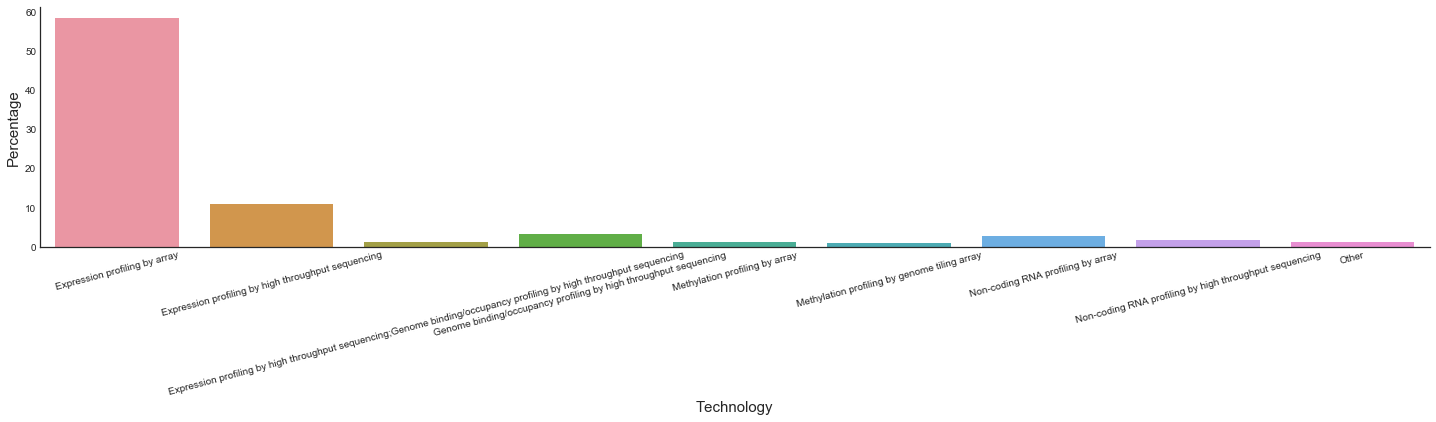

In [28]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='Technology', y='Percentage', data=df_geo_technology,
            height=4,aspect=5,kind='bar')
sns.despine()
#plt.ylim(0, 50)

# set axis labels
ax.axes[0,0].set_xlabel('Technology', fontsize = 15)
ax.axes[0,0].set_ylabel('Percentage', fontsize = 15)
plt.xticks(rotation=15)


#save to .png
ax.savefig('reuse_by_technology_GEO.png', dpi = 200, bbox_inches = 'tight', transparent = False)